# Vertical analzsis of Temperature T, Relative Humidity RH and their changes DT and DRH

For the T and RH Plots the used timeframe is from 2010-2020,

For the DT and DRH Plots the difference between the period 2010-2020 and 1980-1990 is  displayed.


In [1]:
import os


# load stuff:
from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

#import cartopy.crs as ccrs

from xhistogram.xarray import histogram

In [2]:
#load Datasets
SETNAME1="MERRA2"
#SETNAME="JRA-55"
#Global Params

if SETNAME1=="MERRA2":
    FILES1="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_all/MERRA2_*"
    DATALOC_SPECIFIC1 = 'MERRA2_instM_3d_asm_Np_all/'
    DATALOC1 = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC1
    
elif SETNAME2=="JRA-55":
    FILES2="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_sh/*.nc"
   
    DATALOC_SPECIFIC2 = 'JRA-55_Monthly_1.25_Deg_isobaric_sh/'
    DATALOC2 = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC2
else:
    raise Exception("Sorry, notexisting Setname")

RESLOC_SPECIFIC = ''
RESLOC = '../Res_sh/'  

#What parts of the Notebook should run?
TOPOANALYSIS=True

MASKELEVATION=True
SURFACEVALUES=True

#Times for analysis
t1_start='1980-01-01'
t1_end='1989-12-01'
t2_start='2010-01-01'
t2_end='2019-12-01'


In [3]:
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    DS1 = Dataset(files=FILES1, setname = SETNAME1, dataloc = DATALOC1)

#load Datasets
#SETNAME="MERRA2"
SETNAME2="JRA-55"
#Global Params

if SETNAME1=="MERRA2":
    FILES1="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_all/MERRA2_*"
    DATALOC_SPECIFIC1 = 'MERRA2_instM_3d_asm_Np_all/'
    DATALOC1 = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC1
    
SETNAME2=="JRA-55"
  
FILES2="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_sh/*.nc"

DATALOC_SPECIFIC2 = 'JRA-55_Monthly_1.25_Deg_isobaric_sh/'
DATALOC2 = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC2

with dask.config.set(**{'array.slicing.split_large_chunks': True}): 
    DS2 = Dataset(files=FILES2, setname = SETNAME2, dataloc = DATALOC2)



INT_RES='../Interim_Results/VerticalAnalysis_LandOcean/sh/' 

Loading full dataset MERRA2
<xarray.Dataset>
Dimensions:   (time: 522, p: 42, lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * p         (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-06-01
Data variables:
    RH_model  (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    T         (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    SH        (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Thu May  7 22...
    Filename:                          MERRA2_100.instM_3d_asm_Np.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.inst3_3d...
    Conven

In [4]:
for DS in (DS1,DS2):
    if MASKELEVATION==True and DS.setname=="JRA-55":
        DS_2D = Dataset(files='../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface/*pres.nc', setname = 'JRA-55_2D', dataloc = '../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface/')
        DS.ds = elevation2nan( DS.ds, DS_2D.ds )
        print(DS.ds)

Loading full dataset JRA-55_2D
<xarray.Dataset>
Dimensions:  (time: 480, lon: 288, lat: 145)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    SP       (time, lat, lon) float32 dask.array<chunksize=(480, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jul 11 15:58:11 2023: cdo -f nc --eccodes copy anl_surf...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
<xarray.Dataset>
Dimensions:   (time: 480, p: 37, lat: 145, lon: 288)
Coordinates:
  * time      (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2019-12-01
  * lon       (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat       (lat) float64 -90.0 -88.75 -8

In [5]:
# =======================================================================
#Initilize topography analysis
if TOPOANALYSIS==True:
    TOPO = Dataset(files="../../../../../../work/mh0066/m301053/Data/Topo/topo_r720x360.nc", setname = 'TOPO', dataloc = '../../../../../../work/mh0066/m301053/Data/Topo/')
    TOPO.land_mask = xr.where(TOPO.ds.topo >= 0.0, True, False)
    
    # Reindex the land mask to match the climate data grid
    TOPO.land_mask_reindexed = TOPO.land_mask.reindex_like(DS1.ds, method='nearest')
    print(TOPO.land_mask_reindexed)
    #TOPO.ds.where(TOPO.land_mask_reindexed==False).topo.plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_elevation,cbar_kwargs= cbar_kwargs) for ocean


Loading full dataset TOPO
<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    topo     (lat, lon) float32 dask.array<chunksize=(360, 720), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 05 16:46:47 2023: cdo -f nc topo,r720x360 topo_r720...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...
<xarray.DataArray 'topo' (lat: 361, lon: 576)>
dask.array<getitem, shape=(361, 576), dtype=bool, chunksize=(361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0


In [6]:
from physics_helper import init_rh_calc_vals
with dask.config.set(**{'array.slicing.split_large_chunks': True}): 
    init_rh_calc_vals(DS1)
    init_rh_calc_vals(DS2)

Load existing file for rh_calc_vals from ../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_all/rh_calc_vals.netcdf
<xarray.Dataset>
Dimensions:   (lat: 361, p: 42, lon: 576, time: 522)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * p         (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-06-01
Data variables:
    RH_model  (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    T         (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    SH        (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    RH_calc   (time, p, lat, lon) float64 dask.array<chunksize=(2, 42, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original

In [7]:
# =======================================================================
#A nice Plot function
#plt.rcParams['axes.grid'] = True

def update_norm(vmin,vmax,vcentner=0):
    global norm
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcentner, vmax=vmax)


def startfig(title):

    cols = ['Mask {}'.format(col) for col in ['RH_calc','RH_model']]
    rows = ['{}'.format(row) for row in [SETNAME1, SETNAME2, SETNAME1+"-"+SETNAME2 ]]

    fig, axes = plt.subplots(nrows=3, ncols=2, 
                             figsize=(12, 12),
                             sharex=True, sharey=True,
                             constrained_layout=True,
                            )

    plt.setp(axes.flat, xlabel='X-label', ylabel='Y-label')

    fig.suptitle(f'Vertical analysis ({title})',size='x-large',)

    pad = 5 # in points

    for ax, col in zip(axes[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                   )

    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center',
                   )
    
    
    
    
    return fig, axes
    

    
def seloceanland2(data):
    ocean=[data[0].where(TOPO.land_mask_reindexed==False),data[1].where(TOPO.land_mask_reindexed==False)]
    land=[data[0].where(TOPO.land_mask_reindexed==True),data[1].where(TOPO.land_mask_reindexed==True)]
    return ocean,land
        
def endfig(fig, axes, name:str):
    
    #cbar1=fig.colorbar(artlist, ax=axes[2], location='right',ticks=np.linspace(vmin, vmax,21))
    
    #cbar.ax.set_yticklabels(np.linspace(vmin, vmax,10))
    
    # Enable Grid
    [ax.grid(True) for ax in axes.flat]
    #fig.tight_layout()
    #fig.subplots_adjust(left=0.15, top=0.95)
        
    plt.savefig(RESLOC+RESLOC_SPECIFIC+name,)#dpi=400
    
    plt.show()
    
    return




def save(data,name):  # redundant dont use
    data.to_netcdf(path=INT_RES+name)
    return

def plot_hist_RH(data1,data2,i,j):
    
  
    ds=extract_below_temp_inv(data1.groupby('time.month').mean(("time")) )
    hist1 = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
    RH_hist1= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.T)))
    
    ds=extract_below_temp_inv(data2.groupby('time.month').mean(("time")) )
    hist2 = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
    RH_hist2= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.T)))
    
    
    global artlist
    artlist=(-RH_hist1/hist1+RH_hist2/hist2).T.plot(ax=axes[i,j],yincrease=False,norm=norm, levels=levels,cmap=cmap,)#add_colorbar =False,)
    
    
    
    print(f"Done with axes[{i},{j}]")
    return (-RH_hist1/hist1+RH_hist2/hist2)


def plot_hist_DRH(data1,data2,data3,data4,i,j):
    
  
    ds=extract_below_temp_inv(data1.groupby('time.month').mean(("time")) )
    hist1 = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
    RH_hist1= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.T)))
    
    ds=extract_below_temp_inv(data2.groupby('time.month').mean(("time")) )
    hist2 = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
    RH_hist2= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.T)))
    
    ds1=-RH_hist1/hist1+RH_hist2/hist2
    
    ds=extract_below_temp_inv(data3.groupby('time.month').mean(("time")) )
    hist3 = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
    RH_hist3= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.T)))
    
    ds=extract_below_temp_inv(data4.groupby('time.month').mean(("time")) )
    hist4 = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
    RH_hist4= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.T)))
    
    ds2=-RH_hist3/hist3+RH_hist4/hist4
    
    global artlist
    artlist=(ds1-ds2).T.plot(ax=axes[i,j],yincrease=False,norm=norm, levels=levels,cmap=cmap,)#add_colorbar =False,)
    
    
    
    print(f"Done with axes[{i},{j}]")
    return -RH_hist1/hist1+RH_hist2/hist2-(-RH_hist3/hist3+RH_hist4/hist4)

def plot_T(data,i,j):
   
    ds=data.mean(("time","lon"))
        
    
    global artlist
    artlist=ds.plot.contourf(ax=axes[i,j],yincrease=False,norm=norm, levels=levels, x='lat',y='p',cmap=cmap,)#add_colorbar =False,)
    
    print(f"Done with axes[{i},{j}]")
    return ds

def plot_DT(data1,data2,i,j):
    
    
    ds = -data1.mean(('time','lon'))+data2.mean(('time','lon'))
    
    global artlist
    artlist=ds.plot.contourf(ax=axes[i,j],yincrease=False,norm=norm, levels=levels, x='lat',y='p',cmap=cmap,)#add_colorbar =False,)
    print(f"Done with axes[{i},{j}]")
    return ds

def plot_DDT(data1,data2,data3,data4,i,j):
    
    
    ds = -data1.mean(('time','lon'))+data2.mean(('time','lon'))  - ( -data3.mean(('time','lon'))+data4.mean(('time','lon'))  )
    
    global artlist
    artlist=ds.plot.contourf(ax=axes[i,j],yincrease=False,norm=norm, levels=levels, x='lat',y='p',cmap=cmap,)#add_colorbar =False,)
    print(f"Done with axes[{i},{j}]")
    return ds

In [8]:
# =======================================================================
# Parameter

t1=t2_start
t2=t2_end

latbins = np.arange(-90,90,3)
tbins = np.arange(-80,30 , 10)

vmin=-70
vmax=30
levels=30
cmap=cmap_T
update_norm(vmin,vmax)

#

Ocean=True
Land=False





## Temperature Plots

In [9]:
# =======================================================================
# Plot p vs lat, T, 
'''

ocean1=DS1.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)
land1=DS1.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True)
ocean2=DS2.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)
land2=DS2.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True)


title='PvsLat_T_'

fig, axes = startfig(title)

update_norm(vmin=-70,vmax=30)

plot_T(land1,0,0).to_netcdf(path=INT_RES+title+'_0,0.nc')
plot_T(ocean1,0,1).to_netcdf(path=INT_RES+title+'_0,1.nc')
plot_T(land2,1,0).to_netcdf(path=INT_RES+title+'_1,0.nc')
plot_T(ocean2,1,1).to_netcdf(path=INT_RES+title+'_0,1.nc')

update_norm(vmin=-3,vmax=3)

plot_T(land1-land2,2,0).to_netcdf(path=INT_RES+title+'_2,0.nc')
plot_T(ocean1-ocean2,2,1).to_netcdf(path=INT_RES+title+'_2,1.nc')

endfig(fig,axes,title)'''

"\n\nocean1=DS1.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)\nland1=DS1.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True)\nocean2=DS2.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)\nland2=DS2.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True)\n\n\ntitle='PvsLat_T_'\n\nfig, axes = startfig(title)\n\nupdate_norm(vmin=-70,vmax=30)\n\nplot_T(land1,0,0).to_netcdf(path=INT_RES+title+'_0,0.nc')\nplot_T(ocean1,0,1).to_netcdf(path=INT_RES+title+'_0,1.nc')\nplot_T(land2,1,0).to_netcdf(path=INT_RES+title+'_1,0.nc')\nplot_T(ocean2,1,1).to_netcdf(path=INT_RES+title+'_0,1.nc')\n\nupdate_norm(vmin=-3,vmax=3)\n\nplot_T(land1-land2,2,0).to_netcdf(path=INT_RES+title+'_2,0.nc')\nplot_T(ocean1-ocean2,2,1).to_netcdf(path=INT_RES+title+'_2,1.nc')\n\nendfig(fig,axes,title)"

In [10]:
def sel(ds,t1,t2,region):
    if region=='o':
        region=False
    else:
        region=True
    return ds.ds.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==region)


## Temperature Change 


In [11]:
# =======================================================================
# Plot p vs lat, DT, 


'''

title='PvsLat_DT_'

fig, axes = startfig(title)

update_norm(vmin=-2,vmax=2)

plot_DT(sel(DS1,t1_start,t1_end,'l').T,sel(DS1,t2_start,t2_end,'l').T,0,0).to_netcdf(path=INT_RES+title+'_0,0.nc')
plot_DT(sel(DS1,t1_start,t1_end,'o').T,sel(DS1,t2_start,t2_end,'o').T,0,1).to_netcdf(path=INT_RES+title+'_0,1.nc')
plot_DT(sel(DS2,t1_start,t1_end,'l').T,sel(DS2,t2_start,t2_end,'l').T,1,0).to_netcdf(path=INT_RES+title+'_1,0.nc')
plot_DT(sel(DS2,t1_start,t1_end,'o').T,sel(DS2,t2_start,t2_end,'o').T,1,1).to_netcdf(path=INT_RES+title+'_0,1.nc')

update_norm(vmin=-2,vmax=2)

plot_DDT(sel(DS1,t1_start,t1_end,'l').T,sel(DS1,t2_start,t2_end,'l').T,sel(DS2,t1_start,t1_end,'l').T,sel(DS2,t2_start,t2_end,'l').T,2,0).to_netcdf(path=INT_RES+title+'_2,0.nc')
plot_DDT(sel(DS1,t1_start,t1_end,'o').T,sel(DS1,t2_start,t2_end,'o').T,sel(DS2,t1_start,t1_end,'o').T,sel(DS2,t2_start,t2_end,'o').T,2,1).to_netcdf(path=INT_RES+title+'_2,1.nc')

endfig(fig,axes,title)
'''

"\n\ntitle='PvsLat_DT_'\n\nfig, axes = startfig(title)\n\nupdate_norm(vmin=-2,vmax=2)\n\nplot_DT(sel(DS1,t1_start,t1_end,'l').T,sel(DS1,t2_start,t2_end,'l').T,0,0).to_netcdf(path=INT_RES+title+'_0,0.nc')\nplot_DT(sel(DS1,t1_start,t1_end,'o').T,sel(DS1,t2_start,t2_end,'o').T,0,1).to_netcdf(path=INT_RES+title+'_0,1.nc')\nplot_DT(sel(DS2,t1_start,t1_end,'l').T,sel(DS2,t2_start,t2_end,'l').T,1,0).to_netcdf(path=INT_RES+title+'_1,0.nc')\nplot_DT(sel(DS2,t1_start,t1_end,'o').T,sel(DS2,t2_start,t2_end,'o').T,1,1).to_netcdf(path=INT_RES+title+'_0,1.nc')\n\nupdate_norm(vmin=-2,vmax=2)\n\nplot_DDT(sel(DS1,t1_start,t1_end,'l').T,sel(DS1,t2_start,t2_end,'l').T,sel(DS2,t1_start,t1_end,'l').T,sel(DS2,t2_start,t2_end,'l').T,2,0).to_netcdf(path=INT_RES+title+'_2,0.nc')\nplot_DDT(sel(DS1,t1_start,t1_end,'o').T,sel(DS1,t2_start,t2_end,'o').T,sel(DS2,t1_start,t1_end,'o').T,sel(DS2,t2_start,t2_end,'o').T,2,1).to_netcdf(path=INT_RES+title+'_2,1.nc')\n\nendfig(fig,axes,title)\n"

## Plots for RH

In [12]:
# =======================================================================
# Parameter fuer RH Plot

vmin=0
vmax=1
levels=30
cmap=cmap_RH
update_norm(vmin,vmax,0.5)

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


Done with axes[0,0]
Done with axes[0,1]
Done with axes[1,0]
Done with axes[1,1]
Done with axes[2,0]


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/array/core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 38
  result = blockwise(


Done with axes[2,1]


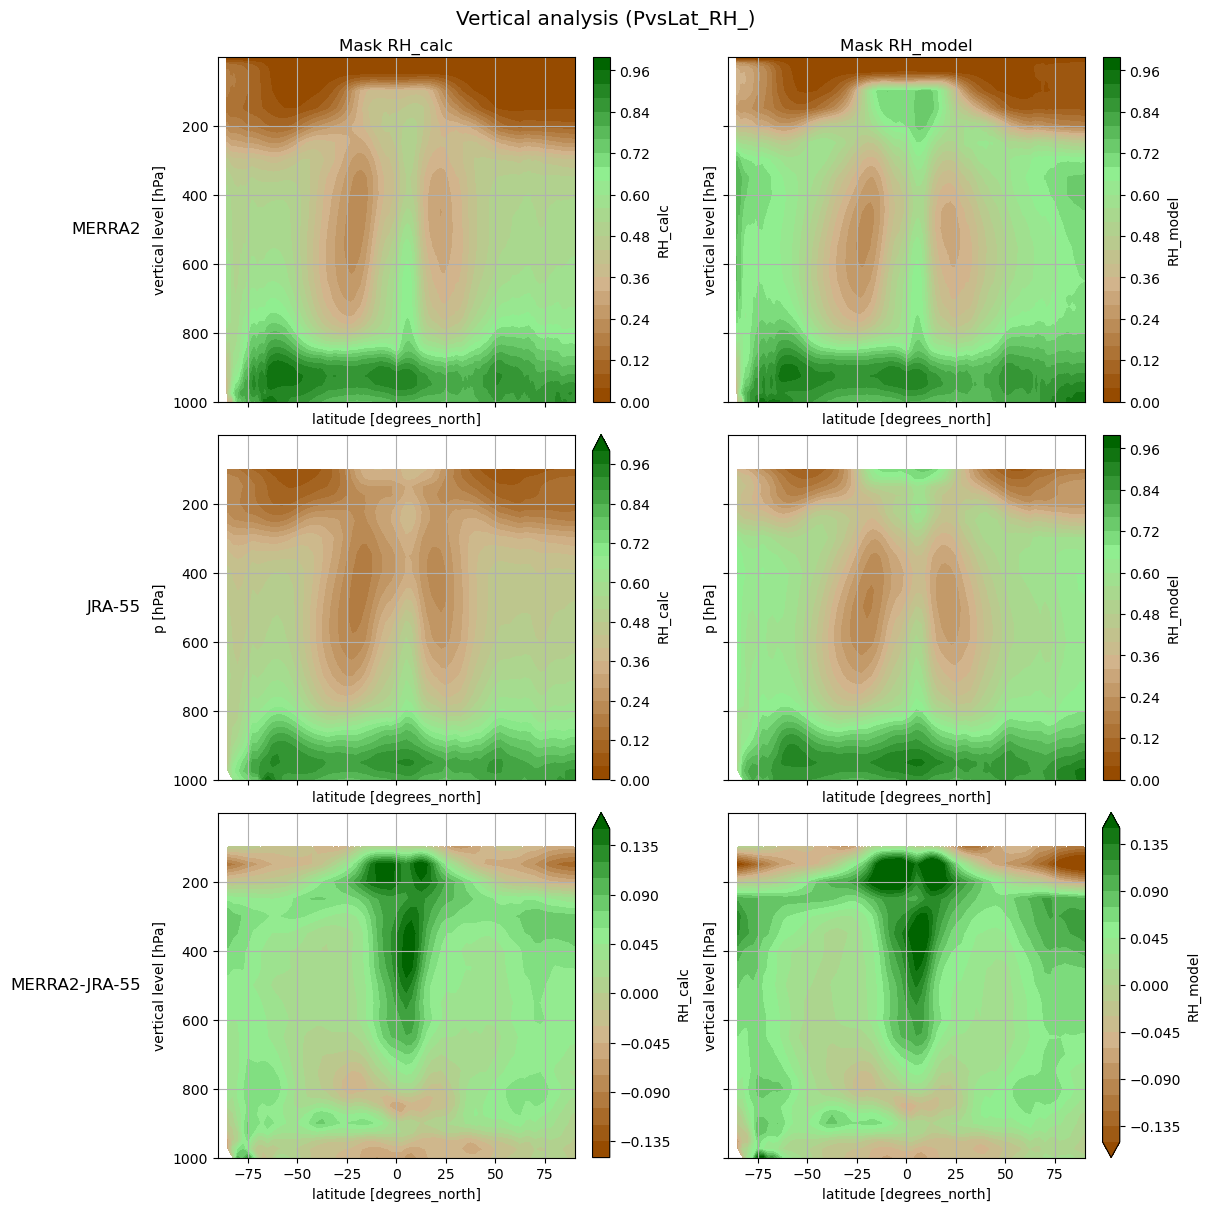

In [13]:
# =======================================================================
# Plot p vs lat, RH, 


ocean1=DS1.ds.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)

ocean2=DS2.ds.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False)



title='PvsLat_RH_'

fig, axes = startfig(title)

update_norm(0,1,0.5)

plot_T(ocean1.RH_calc,0,0).to_netcdf(path=INT_RES+title+'_0,0.nc')
plot_T(ocean1.RH_model,0,1).to_netcdf(path=INT_RES+title+'_0,1.nc')
plot_T(ocean2.RH_calc,1,0).to_netcdf(path=INT_RES+title+'_1,0.nc')
plot_T(ocean2.RH_model,1,1).to_netcdf(path=INT_RES+title+'_0,1.nc')

update_norm(-.15,.15)

plot_T(ocean1.RH_calc-ocean2.RH_calc,2,0).to_netcdf(path=INT_RES+title+'_2,0.nc')
plot_T(ocean1.RH_model-ocean2.RH_model,2,1).to_netcdf(path=INT_RES+title+'_2,1.nc')

endfig(fig,axes,title)


## Plot of RH Change

In [14]:
# =======================================================================
# Parameter fuer RH Plot

vmin=-0.05
vmax=0.05
update_norm(vmin,vmax)
cmap = cmap_RH_change_gray

AttributeError: 'Dataset' object has no attribute 'RH'

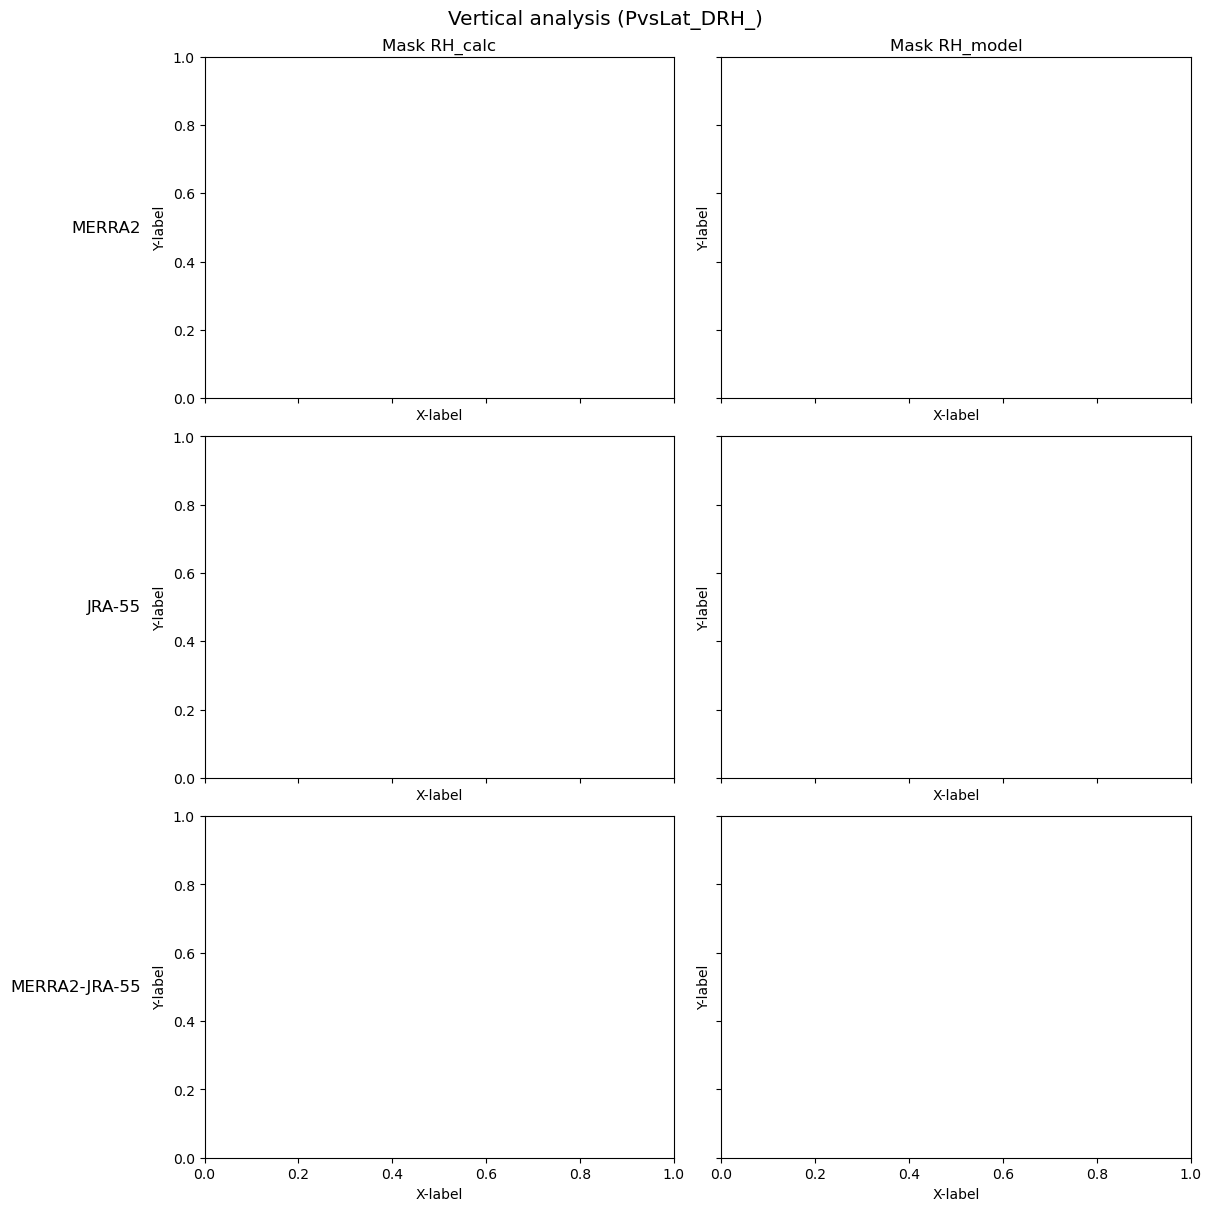

In [15]:
# =======================================================================
# Plot p vs lat, DRH, 




title='PvsLat_DRH_'

fig, axes = startfig(title)

update_norm(vmin=-.1,vmax=.1)

plot_DT(sel(DS1,t1_start,t1_end,'l').RH,sel(DS1,t2_start,t2_end,'l').RH,0,0).to_netcdf(path=INT_RES+title+'_0,0.nc')
plot_DT(sel(DS1,t1_start,t1_end,'o').RH,sel(DS1,t2_start,t2_end,'o').RH,0,1).to_netcdf(path=INT_RES+title+'_0,1.nc')
plot_DT(sel(DS2,t1_start,t1_end,'l').RH,sel(DS2,t2_start,t2_end,'l').RH,1,0).to_netcdf(path=INT_RES+title+'_1,0.nc')
plot_DT(sel(DS2,t1_start,t1_end,'o').RH,sel(DS2,t2_start,t2_end,'o').RH,1,1).to_netcdf(path=INT_RES+title+'_0,1.nc')

update_norm(vmin=-.1,vmax=.1)

plot_DDT(sel(DS1,t1_start,t1_end,'l').RH,sel(DS1,t2_start,t2_end,'l').RH,sel(DS2,t1_start,t1_end,'l').RH,sel(DS2,t2_start,t2_end,'l').RH,2,0).to_netcdf(path=INT_RES+title+'_2,0.nc')
plot_DDT(sel(DS1,t1_start,t1_end,'o').RH,sel(DS1,t2_start,t2_end,'o').RH,sel(DS2,t1_start,t1_end,'o').RH,sel(DS2,t2_start,t2_end,'o').RH,2,1).to_netcdf(path=INT_RES+title+'_2,1.nc')

endfig(fig,axes,title)

In [ ]:
# =======================================================================
# Parameter fuer DRH Plot

vmin = -2
vmax = 2

# =======================================================================
# Plot T vs lat, DRH, 

ocean1=DS1.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False).mean('time')
land1=DS1.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True).mean('time')
ocean2=DS2.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==False).mean('time')
land2=DS2.ds.T.sel(time=slice(t1,t2)).where(TOPO.land_mask_reindexed==True).mean('time')




sel(DS1,t1_start,t2_start,'o')

title='TvsLat_DRH_'

fig, axes = startfig(title)

update_norm(-.1,.1)

l1=plot_hist_RH(sel(DS1,t1_start,t1_start,'l'),sel(DS1,t2_start,t2_start,'l'),0,0)#.to_netcdf(path=INT_RES+title+'_0,0.nc')
o1=plot_hist_RH(sel(DS1,t1_start,t1_start,'o'),sel(DS1,t2_start,t2_start,'o'),0,1)#.to_netcdf(path=INT_RES+title+'_0,1.nc')
l2=plot_hist_RH(sel(DS2,t1_start,t1_start,'l'),sel(DS2,t2_start,t2_start,'l'),1,0)#.to_netcdf(path=INT_RES+title+'_1,0.nc')
o2=plot_hist_RH(sel(DS2,t1_start,t1_start,'o'),sel(DS2,t2_start,t2_start,'o'),1,1)#.to_netcdf(path=INT_RES+title+'_0,1.nc')

update_norm(vmin=-.1,vmax=.1)


(l1-l2).T.plot(ax=axes[2,0],yincrease=False,norm=norm, levels=levels,cmap=cmap,)#add_colorbar =False,)
(o1-o2).T.plot(ax=axes[2,1],yincrease=False,norm=norm, levels=levels,cmap=cmap,)#add_colorbar =False,)


endfig(fig,axes,title)
#plot_hist_DRH(sel(DS1,t1_start,t1_end,'l'),sel(DS1,t2_start,t2_end,'l'),sel(DS2,t1_start,t1_end,'l'),sel(DS2,t2_start,t2_end,'l'),2,0).to_netcdf(path=INT_RES+title+'_2,0.nc')
#plot_hist_DRH(sel(DS1,t1_start,t1_end,'o'),sel(DS1,t2_start,t2_end,'o'),sel(DS2,t1_start,t1_end,'o'),sel(DS2,t2_start,t2_end,'o'),2,1).to_netcdf(path=INT_RES+title+'_2,1.nc')

